In [55]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
# font_list_mac = fm.()
# print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
# path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)
set_matplotlib_formats('retina')
plt.rcParams['font.family'] = 'AppleGothic'

버전:  3.2.1
설치 위치:  /Users/dhkim/PycharmProjects/untitled/venv/lib/python3.8/site-packages/matplotlib/__init__.py
설정 위치:  /Users/dhkim/.matplotlib
캐시 위치:  /Users/dhkim/.matplotlib
설정 파일 위치:  /Users/dhkim/PycharmProjects/untitled/venv/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
328
328
DejaVu Sans


In [56]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
# from konlpy.tag import Twitter
from collections import Counter


In [57]:
names = ['작성시간','작성자','위치','내용','좋아요수','해쉬태그']
crawling_data = pd.read_csv('여의동.txt', sep="\t", names=names)
# crawling_data = pd.read_csv('서교동_중복제거.txt', sep="\t", header=0)
crawling_data.tail(5)
print(crawling_data.shape)

(628, 6)


In [9]:
crawling_data2 = pd.read_csv('여의도역.txt', sep="\t", names=names)
crawling_data2.shape

(401, 6)

In [7]:
crawling_data = crawling_data.drop_duplicates()
crawling_data.shape
crawling_data.to_csv("여의동_중복제거.txt",sep="\t")

In [11]:
crawling_data2 = crawling_data2.drop_duplicates()
print(crawling_data2.shape)
crawling_data2.to_csv("여의도역_중복제거.txt",sep="\t")

(311, 6)


In [15]:
crawling_data3 = pd.concat([crawling_data, crawling_data2])
crawling_data3.shape
crawling_data3.to_csv("여의동_여의도역.txt",sep="\t")

In [17]:
crawling_data3.shape
crawling_data = crawling_data3

In [18]:
timedata = crawling_data['작성시간']
day_data = timedata.str.slice(stop=10)
hour = timedata.str.slice(start=11,stop=-11)
year = day_data.str.slice(stop=4)
month = day_data.str.slice(start=5,stop=7)
day = day_data.str.slice(start=8,stop=10)
post_crawl = crawling_data.copy()
post_crawl['year'] = year
post_crawl['month'] = month
post_crawl['day'] = day
post_crawl['hour'] = hour
post_crawl = post_crawl[['year','month','작성자','hour','위치','해쉬태그','좋아요수']]
# daydata = timedata

In [19]:
def process_hash_tag(df):
    df["해쉬태그"] = df["해쉬태그"].str.split("_") 
    results = []
    for row in df['해쉬태그']:
#         print(row)
        if row is np.nan:
            results.append(0)
        else:
            temp = []
            for x in row:
                try:
                    if len(x)>0 and x[0]=="#":
                        temp.append(x[1:])
                except SyntaxError:
                    temp.append(x)
            if temp == []:
                temp =0
            results.append(temp)
    df['해쉬태그'] = results


In [20]:
process_hash_tag(post_crawl)
post_crawl

,year,month,작성자,hour,위치,해쉬태그,좋아요수
0,2018,06,88.11.02,03,여의동주민센터,0,70
1,2017,05,felixsuh,05,여의동주민센터,0,74
2,2017,05,gorgeoushong,07,여의동주민센터,[선거],107
3,2017,06,infaco_min,13,여의동주민센터,"[쌈마이웨이, 드라마, 촬영중, 여의도, 김주만, 백설희]",147
4,2017,05,a_anne0513,05,여의동주민센터,"[대통령선거, 사전투표, 여의동주민센터, 선거, 투표, 투표인증, vote]",59
...,...,...,...,...,...,...,...
362,2020,05,gwangjun_2,05,여의도역,"[오늘, 날씨, 더움, 근로자의날, 나는, 일, 촬영, 내림머리, 코로나, 꽃가루,...",51
367,2018,09,babebani,09,Yeouido,0,NaN
377,2020,05,dami_duomei,10,여의도역,0,36
383,2020,04,aruhi_specialday,02,여의도역,"[아루히, 스시아루히, 아루히가아루히답게, 너의사랑나의사랑아루히, 여전히언제나아루히...",363


In [39]:
tag_post = post_crawl[post_crawl["해쉬태그"]!=0]
print(tag_post.shape)
tags = tag_post["해쉬태그"]

(608, 7)


In [71]:
all_tags = np.concatenate(np.array(tags))
post_all_tags = []
for tag in all_tags:
    if ("인스타그램" in tag) or ("인스타" in tag) or ("서교동" in tag) or ("홍대" in tag) or ("맞팔" in tag) or (tag=="소통") and not ("데이트" in tag):
        continue
    elif ("선팔" in tag) or (tag=="좋아요") or ("like" in tag) or ("팔로잉" in tag) or ("셀피" in tag) or ("셀카" in tag) or ("좋튀" in tag) or ("댓글" in tag) or ("f4f" in tag):
        continue
        
    elif ("selfie" in tag) or ("selca" in tag) or ("follow" in tag) or (tag=="daily") or (tag=="일상") or (tag=="선팔하면맞팔") or ("팔로우" in tag) or ("좋아요반사"==tag):
        continue
    elif ("연남" in tag) or ("합정" in tag) or("좋아요반사"==tag) or ("맛집" in tag)  or ("망원동" in tag):
        continue
    elif ("일상" in tag) or ("데일리" in tag):
        continue
    elif "동" in tag:
        continue
    elif "박승철" in tag:
        continue
    elif "스타그램" in tag:
#         print(tag)
        newtag = "".join(tag.split("스타그램"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif ("스타" in tag) and ("랍스타" not in tag) and ("파스타" not in tag) and ("스타일" not in tag):
#         print(tag)
        newtag = "".join(tag.split("스타"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif "그램" in tag:
#         print(tag)
        newtag = "".join(tag.split("그램"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    else:
        newtag = tag
    post_all_tags.append(newtag)
post_all_tags


['선거',
 '쌈마이웨이',
 '드라마',
 '촬영중',
 '여의도',
 '김주만',
 '백설희',
 '대통령선거',
 '사전투표',
 '선거',
 '투표',
 '투표인증',
 'vote',
 '19대대통령선거',
 '사전투표',
 '사전투표',
 '투표인증',
 'piginthegarden',
 '아보카도샐러드',
 '엄근진',
 '깐느',
 '현준',
 '닭띠맘',
 'D',
 '투표소사로잡은',
 '인기쟁이',
 '장회장님',
 '415총선',
 '제21대국회의원선거',
 '영등포을',
 '사전투표',
 '코로나19',
 '마스크',
 '발열체크',
 '손세정제',
 '사회적거리',
 '신분증',
 '찍자우리415',
 '여의도',
 '정치1번지',
 '국회의사당',
 '국회의원',
 '투표하는연정은',
 '정치외교학과',
 '전주',
 '찬누리리무진',
 '찬누리투어',
 '28인승리무진',
 '공항수송',
 '전세버스문의',
 '문의환영',
 '일개미',
 '육아소통',
 '육아',
 '이쁜척',
 '멍스타그램',
 '젊줌마',
 '주부',
 '맘스타그램',
 '육아맘',
 '자매맘',
 '도치맘',
 '워킹맘',
 '전주맘',
 '전주',
 '완주',
 '수제갈비',
 '함흥냉면',
 '육회',
 '갈비탕',
 '점심특선',
 '월드컵경기장',
 '탄소산업',
 '하가지구',
 '전주IC',
 '여기가끝이아니다',
 '쵝오에요',
 '산장',
 '황금보다좋은휴무',
 '서비스감사합니다',
 '여의도한강공원',
 '여의도카페',
 '여의도역카페',
 '여의도ifc몰',
 '24살',
 '졸업생',
 '취준생',
 '시원섭섭',
 '겨니',
 '꽃',
 '고마워',
 '장소',
 '강커피',
 '떠라랑',
 '우정',
 '셀스타그램',
 '얼스타그램',
 '전주',
 '이쁜',
 '카페에서',
 '꽃스타그램',
 '대학생',
 '아니라',
 '서글픔',
 '월요일',
 '오후',
 '하트꾹',
 '하트',
 '심심',
 '디엠',
 '21',
 'ff

In [72]:
len([x for x in post_all_tags if '카페' in x])

85

In [73]:
# [x for x in post_all_tags if ('타투' in x) and not ('타투'==x)]
tatoo_num = len([x for x in post_all_tags if ('타투' in x) and not ('타투'==x)])

In [74]:
tatoo_num

0

In [75]:
count = Counter(post_all_tags)
words = dict(count.most_common())

In [76]:
def add_counts(keyword,words):
    new_words = words.copy()
    add_val = 0
    for key,value in words.items():
        if (keyword in key) and (keyword != key):
#             print(f'keyword : {keyword}, key : {key}')
            add_val += value
    new_words[keyword] = add_val
    return new_words

def del_word(keyword,words):
    new_words = words.copy()
    del(new_words[keyword])
    return new_words

In [77]:
new_words = add_counts("카페",words)
new_words = add_counts("맛집",new_words)
new_words = add_counts("영화",new_words)
new_words = add_counts("타투",new_words)
new_words = add_counts("유학",new_words)
new_words = add_counts("데이트",new_words)
words['카페']
new_words['카페']
# new_words

78

In [87]:
new_words2 = del_word("카페",words)
new_words2 = del_word("커피",new_words2)
new_words2 = del_word("먹스타그램",new_words2)
new_words2 = del_word("맛스타그램",new_words2)
new_words2 = del_word("여의도미용실",new_words2)
new_words2 = del_word("마루실장",new_words2)
new_words2 = del_word("여의도제오헤어",new_words2)
new_words2 = del_word("이마트여의도점",new_words2)

# new_words2 = del_word("여의동",new_words2)
# new_words2 = del_word("동산동",new_words2)
# new_words2 = del_word("반월동",new_words2)
# new_words2 = del_word("성독동",new_words2)
# new_words2 = del_word("고랑동",new_words2)
# new_words2 = del_word("용정동",new_words2)
# new_words2 = del_word("만성동",new_words2)
# new_words2 = del_word("서교동",new_words2)
    

In [85]:
def draw_bar_graph(words,save_name):
    col1 = words.keys()
    col2 = words.values()

    df_words = pd.DataFrame()
    df_words['단어'] = col1
    df_words['빈도수'] = col2
    top30 = df_words.nlargest(30,'빈도수')

    plt.figure(figsize=(23,4))
    sns.barplot(data=top30,x='단어',y='빈도수')
    plt.savefig(f"{save_name}_빈도수분석.png")

In [86]:
def draw_wordcloud(words,save_name):
    wordcloud = WordCloud(font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
                          background_color='white',
                          colormap = "Accent_r",
                          width=1500,
                          height=1000).generate_from_frequencies(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()
    plt.savefig(f"{save_name}_워드클라우드.png")


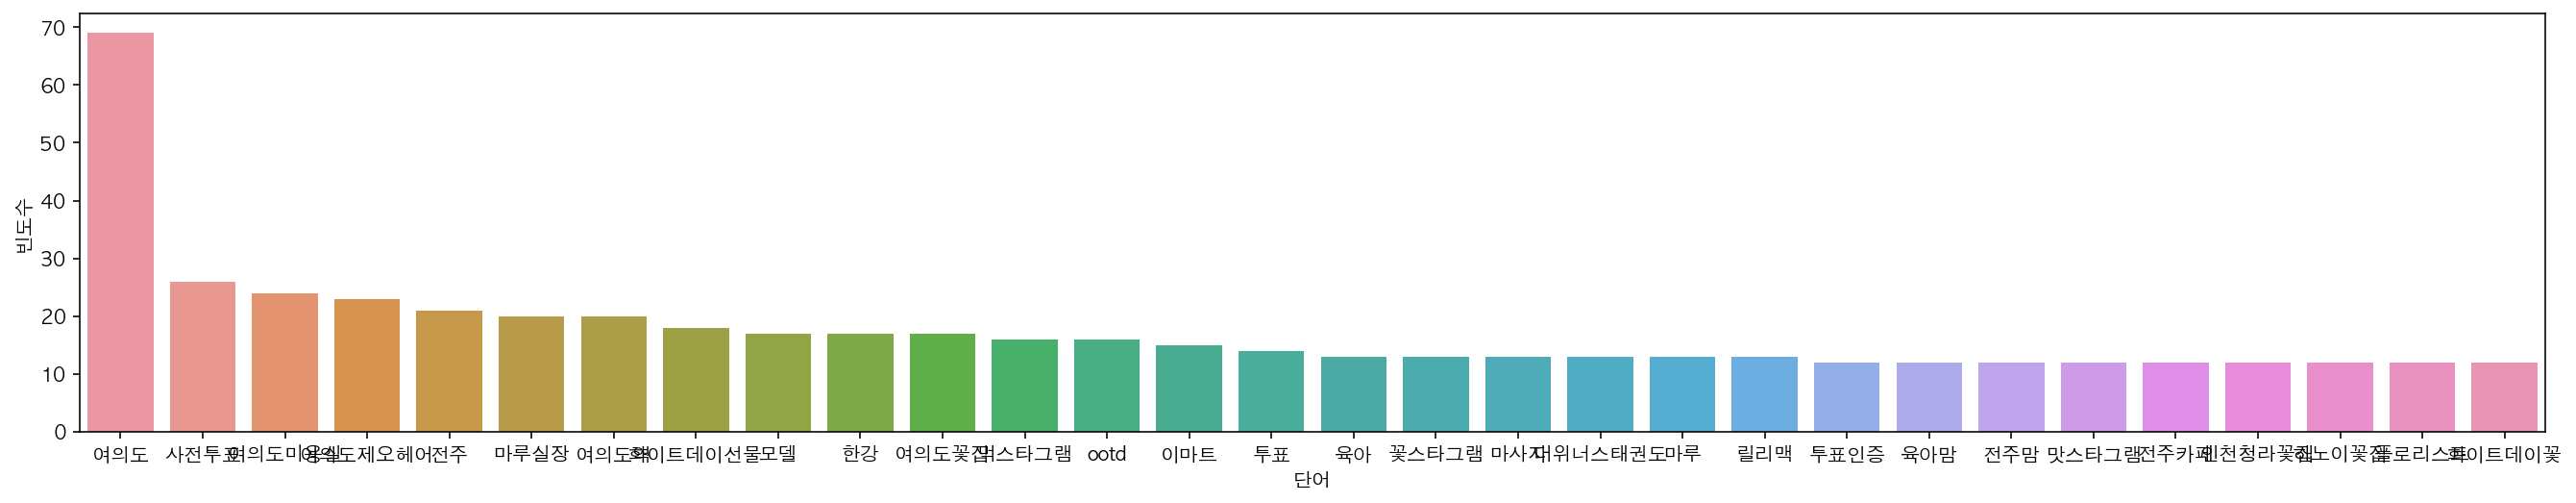

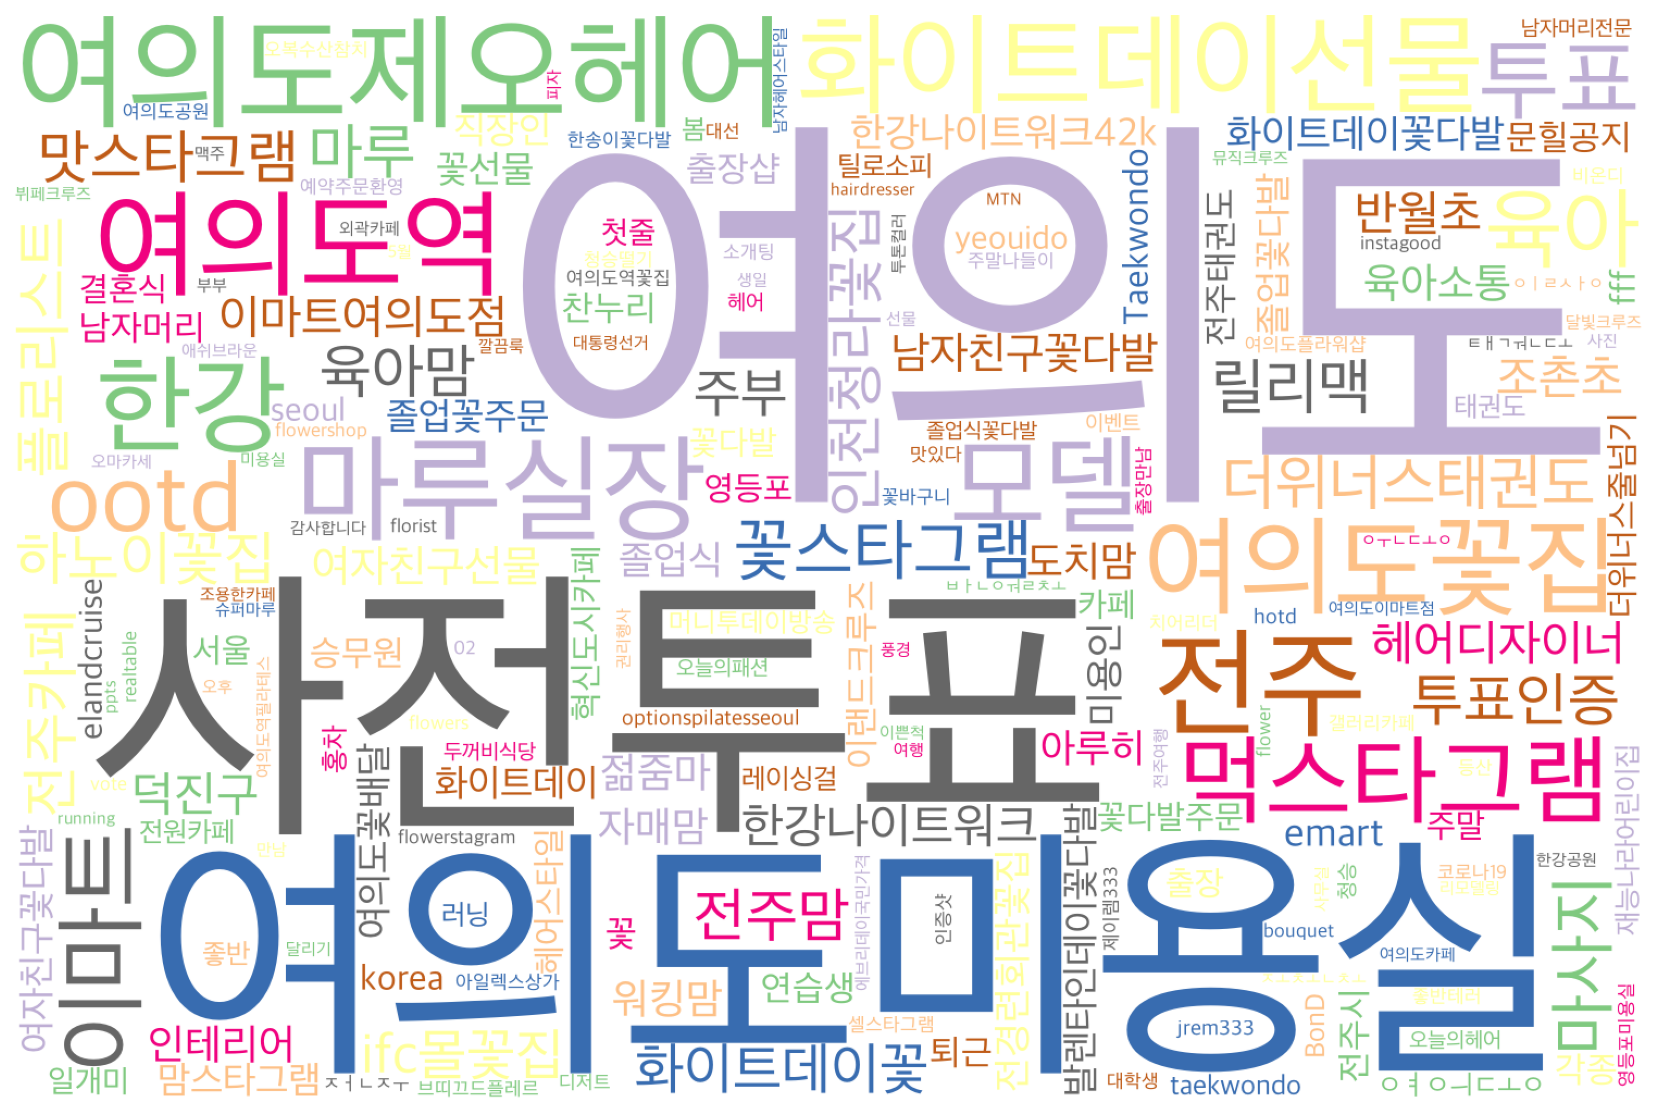

<Figure size 432x288 with 0 Axes>

In [81]:
draw_bar_graph(words,"여의도일대")
draw_wordcloud(words,"여의도일대")

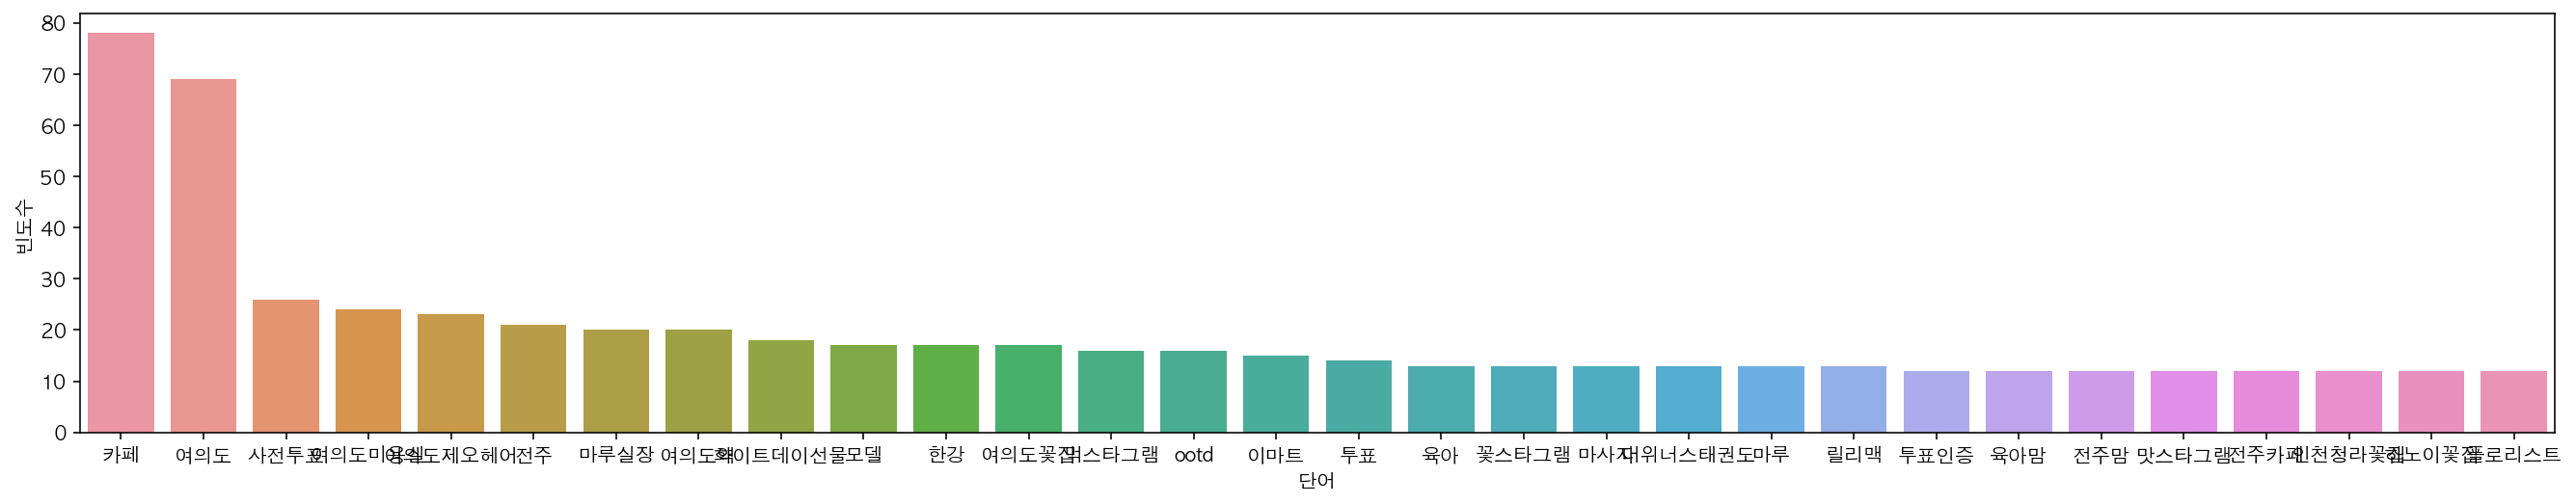

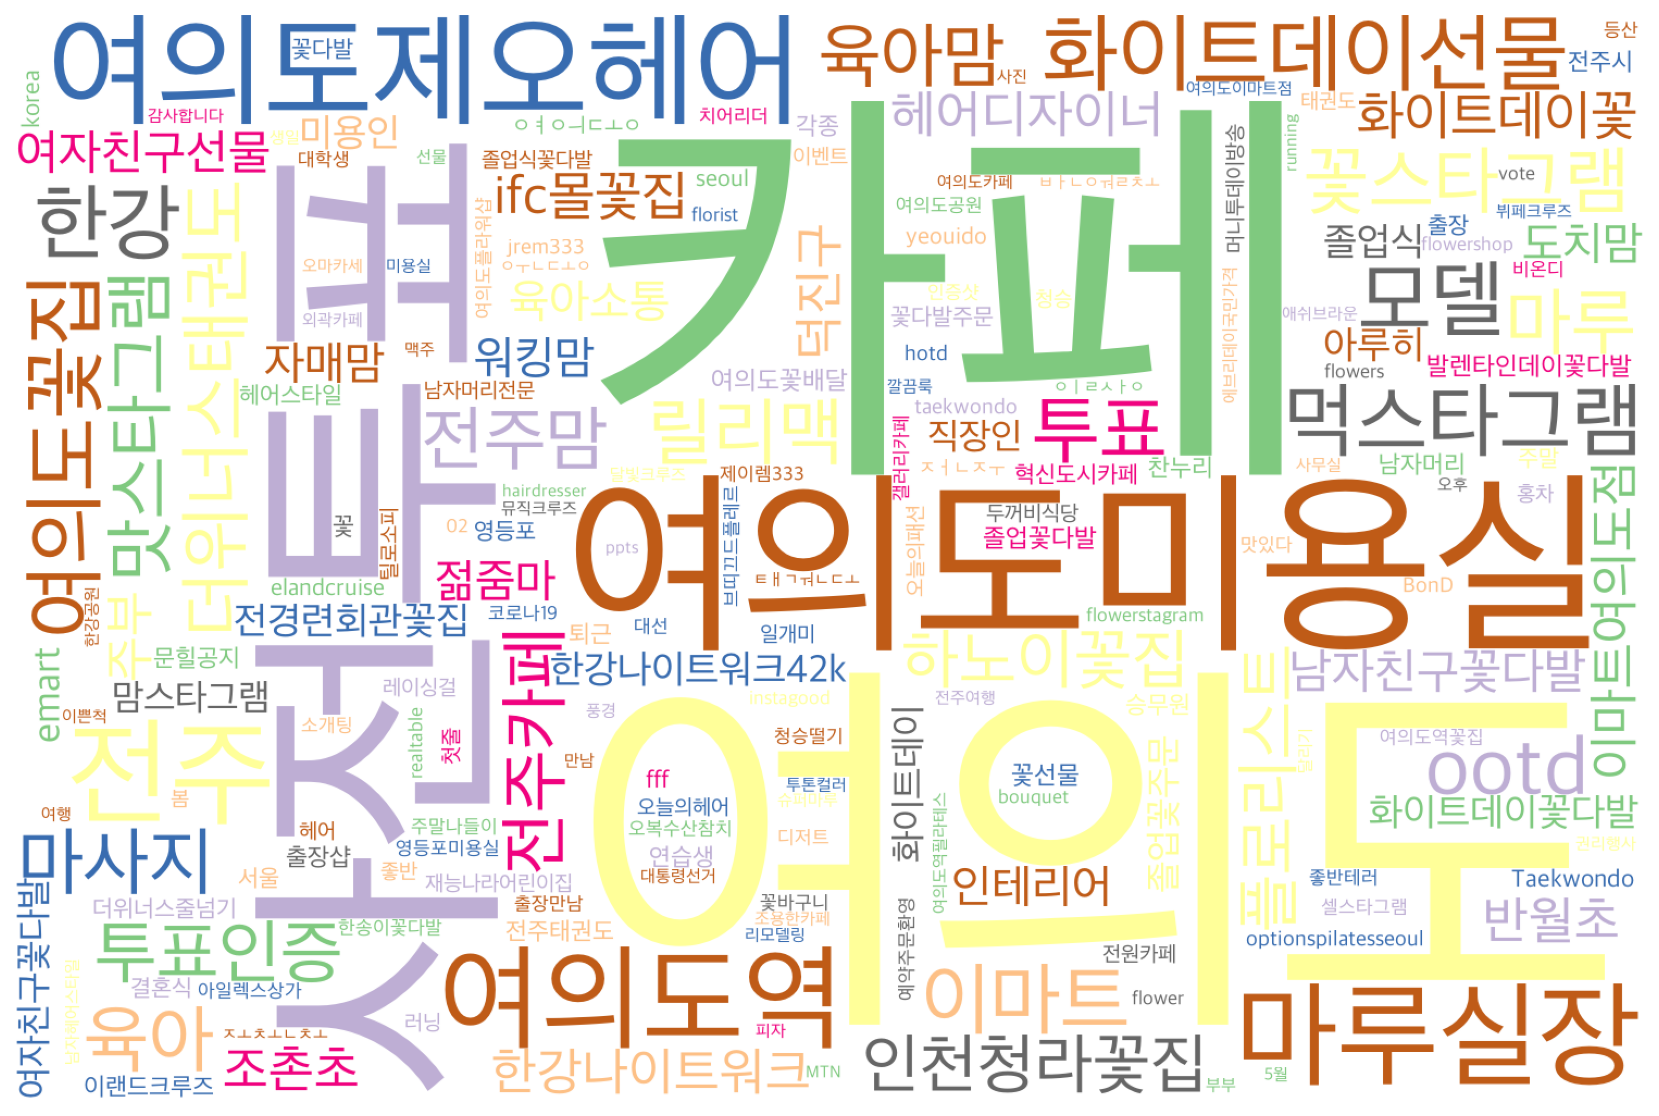

<Figure size 432x288 with 0 Axes>

In [82]:
draw_bar_graph(new_words,"여의도일대_단어집계")
draw_wordcloud(new_words,"여의도일대_단어집계")

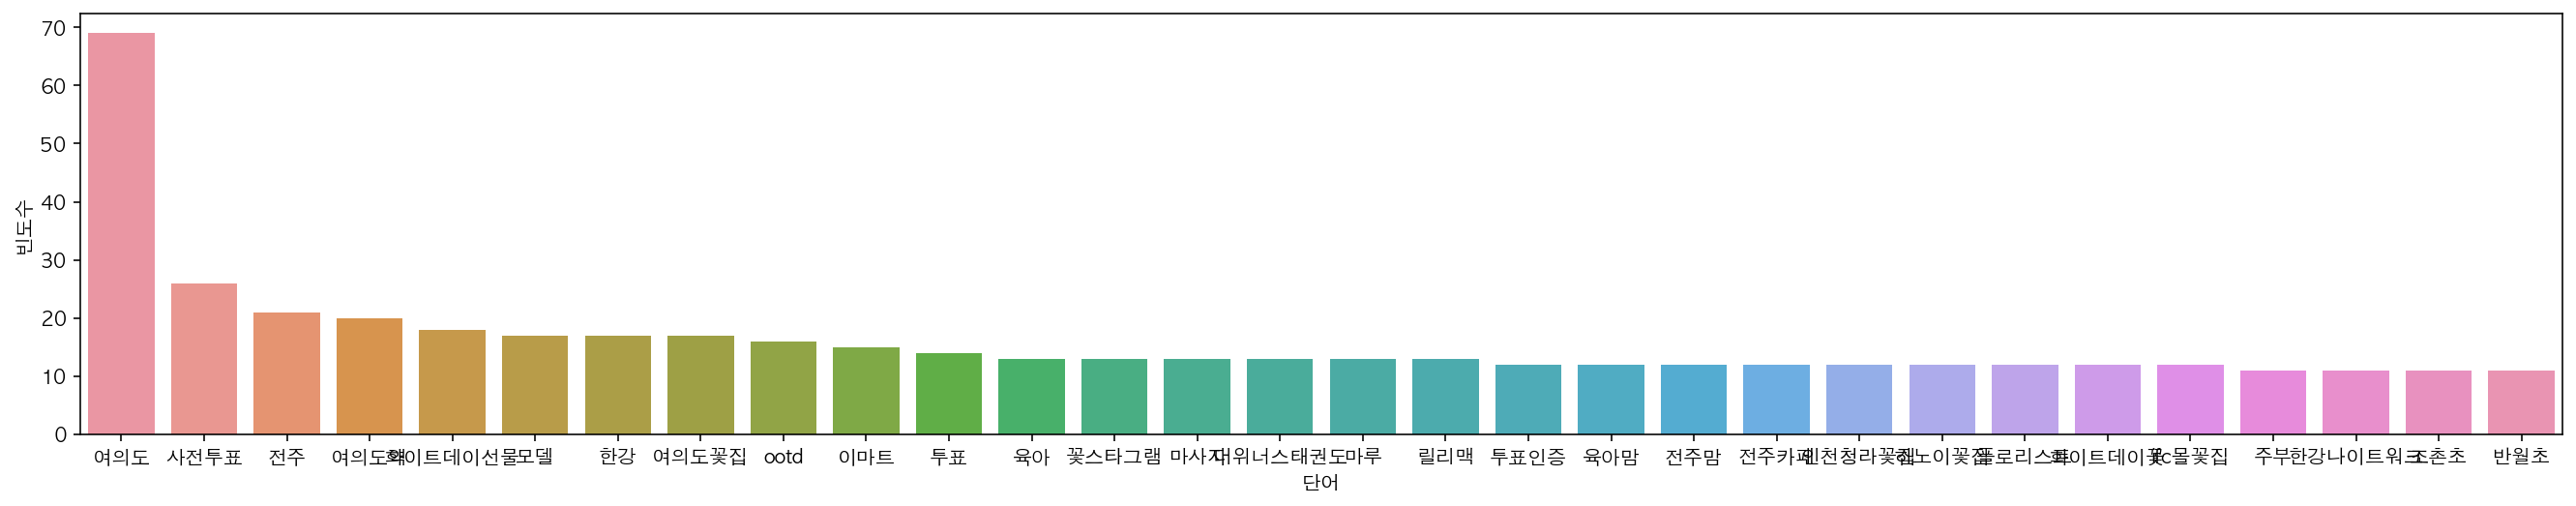

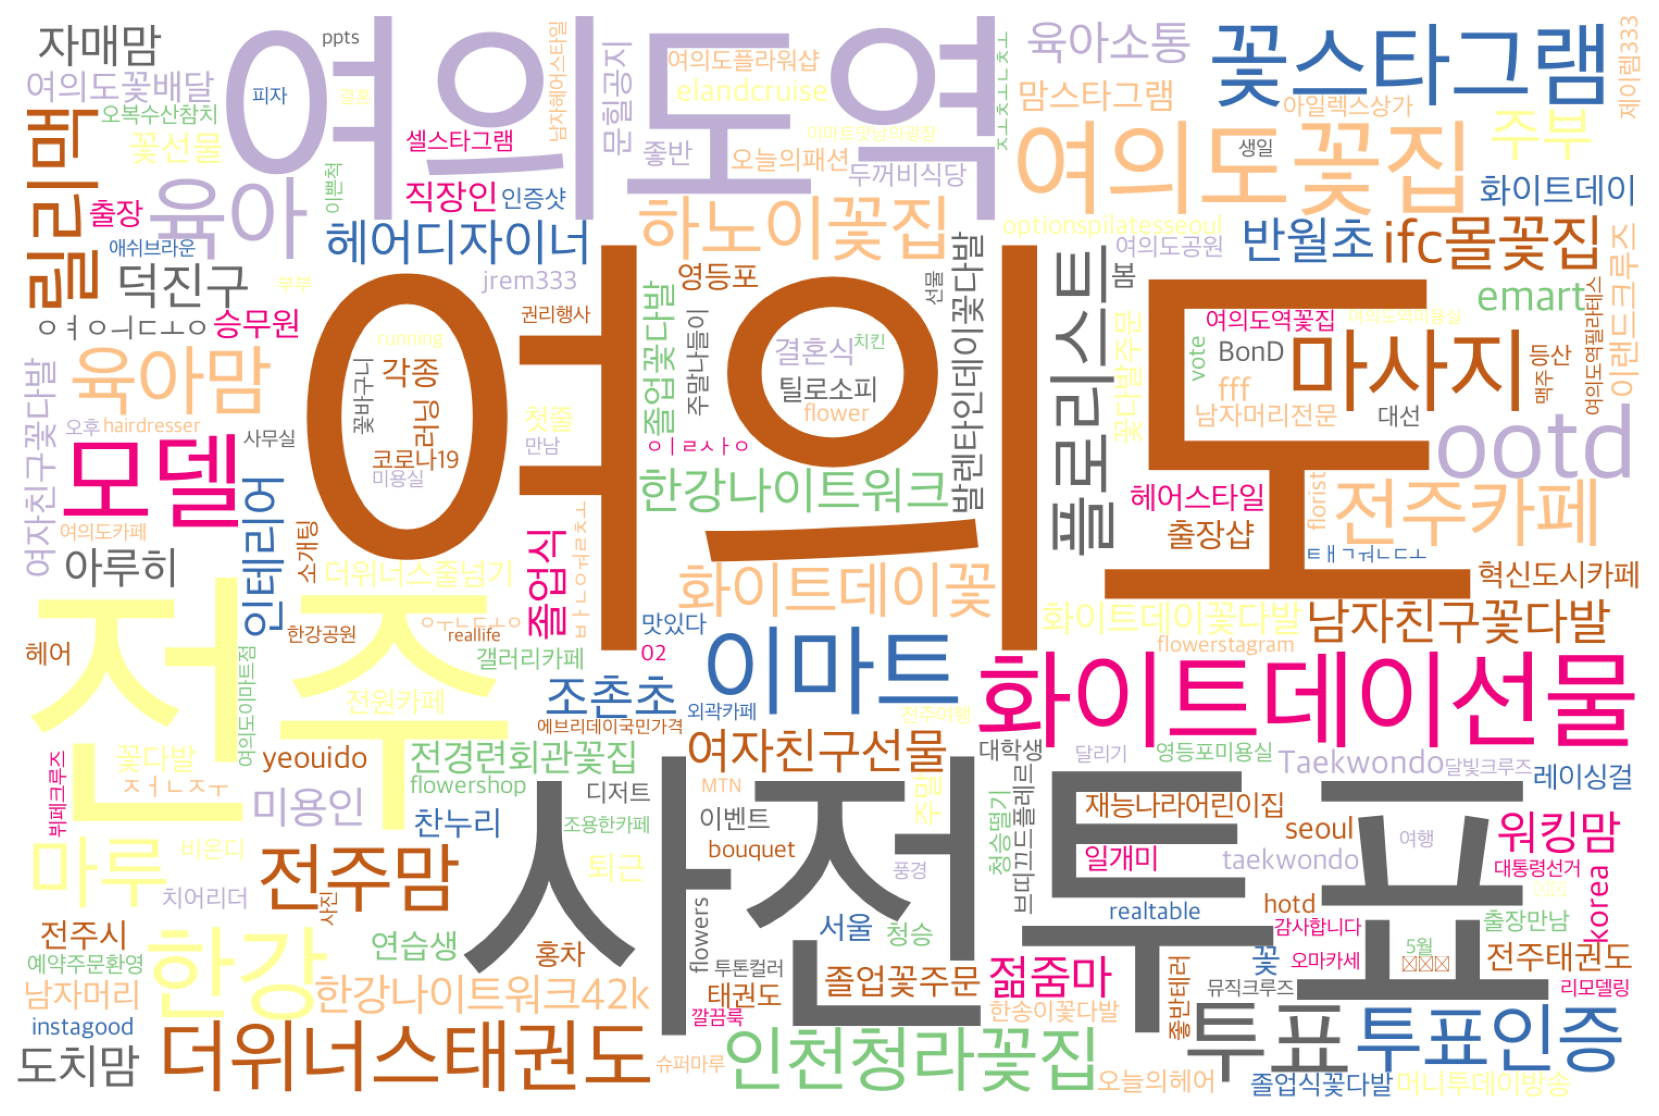

<Figure size 432x288 with 0 Axes>

In [88]:
draw_bar_graph(new_words2,"여의도일대_일부단어제거")
draw_wordcloud(new_words2,"여의도일대_일부단어제거")